In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cross_sections as cs
from constants import g1_nu_e, g2_nu_e, g1_barnu_e, g2_barnu_e, g1_nu_x, g2_nu_x, g1_barnu_x, g2_barnu_x
import pandas as pd
from scipy.interpolate import interp1d


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
x = np.linspace(5, 100, 1000)

In [7]:
channels=['ibd','nue_e','nue_O16','nue_Ar40','nuebar_e', 'nue_C12', 'nc_nue_C12',
         'nuebar_O16']
indexes = [4,1,1,1,4,1,4,4]
xs_data = cs.snowglobes(channels)

In [8]:
cross_scatter = cs.cross_section_NC_nu_e(x, 0, g1_nu_e, g2_nu_e)
cross_scatter_anti = cs.cross_section_NC_nu_e(x, 0, g1_barnu_e, g2_barnu_e)
cross_ivb = cs.cross_section_CC_nu_proton(x)
cross_oxygen = cs.cross_section_nu_e_oxygen(x)
cross_argon = cs.cross_section_nu_e_argon(x)

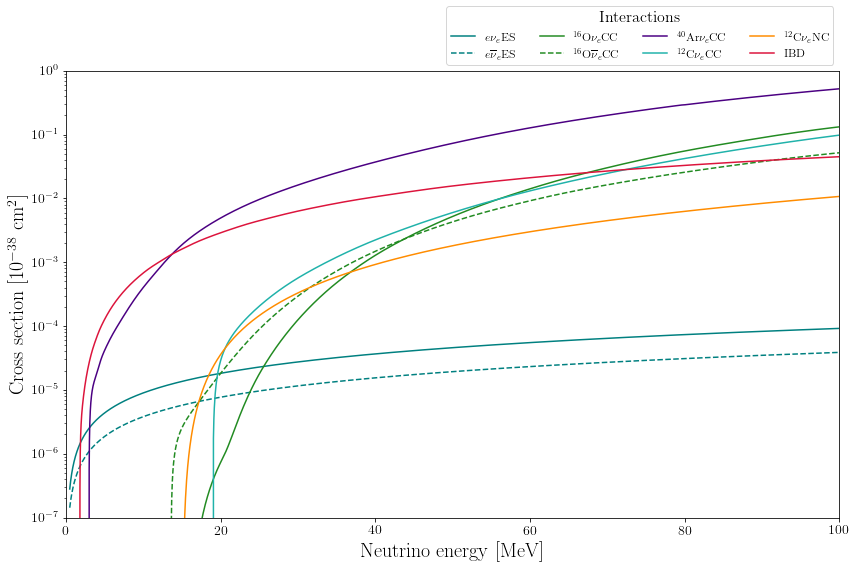

In [9]:
fig = plt.figure(figsize=(12,8))
# plt.plot(x, cross_scatter, color = 'teal', lw = 2,
#         label = r'Analytical ($e \nu_e \mathrm{ES}$)')
plt.plot((10**3)*(10**(xs_data[1][0])),xs_data[1][1]*(10**(xs_data[1][0])),
         label=r'$e \nu_e \mathrm{ES}$', color = 'teal')
# plt.plot(x, cross_scatter_anti, color = 'orange', lw = 2,
#         label = r'Analytical ($e \overline{\nu}_e \mathrm{ES}$)')
plt.plot((10**3)*(10**(xs_data[4][0])),xs_data[4][4]*(10**(xs_data[4][0])),
         label=r'$e \overline{\nu}_e \mathrm{ES}$', color = 'teal', ls = '--')
# plt.plot(x, cross_oxygen, color = 'forestgreen', lw = 2,
#         label = r'Kolbe, E. et al. 2002. $\left(\nu_e + ^{16}\mathrm{O} \right)$')
plt.plot((10**3)*(10**(xs_data[2][0])),xs_data[2][1]*(10**(xs_data[2][0])),
         label=r'$^{16}\mathrm{O}\nu_e\mathrm{CC}$', color = 'forestgreen')
plt.plot((10**3)*(10**(xs_data[7][0])),xs_data[7][4]*(10**(xs_data[7][0])),
         label=r'$^{16}\mathrm{O}\overline{\nu}_e\mathrm{CC}$', color = 'forestgreen',
        ls = '--')
# plt.plot(x, cross_argon, color = 'indigo', lw = 2,
#         label = r'Gardiner, S. 2021. $\left(\nu_e + ^{40}\mathrm{Ar} \right)$')
plt.plot((10**3)*(10**(xs_data[3][0])),xs_data[3][1]*(10**(xs_data[3][0])),
         label=r'$^{40}\mathrm{Ar}\nu_e\mathrm{CC}$', color = 'indigo')
plt.plot((10**3)*(10**(xs_data[5][0])),xs_data[5][1]*(10**(xs_data[5][0])),
         label=r'$^{12}\mathrm{C}\nu_e\mathrm{CC}$', color = 'lightseagreen')
plt.plot((10**3)*(10**(xs_data[6][0])),xs_data[6][1]*(10**(xs_data[6][0])),
         label=r'$^{12}\mathrm{C}\nu_e\mathrm{NC}$', color = 'darkorange')
# plt.plot(x, cross_ivb, color = 'crimson', lw = 2,
#         label = r'Strumia, A., \& Vissani, F. 2003. (IBD)')
plt.plot((10**3)*(10**(xs_data[0][0])),xs_data[0][4]*(10**(xs_data[0][0])),
         label=r'IBD', color = 'crimson')
plt.yscale('log')
lgd = plt.legend(title = 'Interactions', loc='lower right', ncol = 4, bbox_to_anchor = (1,1),
        fontsize = 12)
title = lgd.get_title()
title.set_fontsize(16)
plt.xlabel('Neutrino energy [MeV]', fontsize = 20)
plt.ylabel(r'Cross section [$10^{-38}$ cm$^{2}$]', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(0, 100)
plt.ylim(1e-7, 1)
plt.tight_layout()
fig.patch.set_alpha(1)
for ax in fig.axes:
        ax.patch.set_alpha(1)
# plt.savefig('Plots/cross_sections_neutrinos_boladives.svg',
#             bbox_inches = 'tight', dpi = 300)
plt.show()